# Hajbi et al.

### define process data function

In [1]:
def compare_brine_concentrations(dataframe, raw_data, export_path, literature_cf, original_concentrations = True):
    from chempy.properties.water_density_tanaka_2001 import water_density
    from sigfig import round
    from scipy.constants import milli, kilo
    from chemicals import periodic_table
    from matplotlib import pyplot
    import matplotlib

    pandas.set_option('display.max_columns', None)
    pandas.set_option('display.max_rows', None)
    print('raw_data')
    display(raw_data)
    print('processed_data')
    display(dataframe)

    
    # final effluent concentrations
    final_cf = raw_data['mass_H2O'].iloc[0] / raw_data['mass_H2O'].iloc[-1]
    last_row = dataframe.iloc[-1]
    print('literature_cf', literature_cf)
    print('final_cf', final_cf)

    # feed concentrations
    water_density = water_density()/kilo
    custom_water_parameters = {
        'element': {
            'Ca': {
                'concentration (ppm)':720,
                'reference': ''
            },
            'Mg': {
                'concentration (ppm)':335,
                'reference':''
            },
            'Na': {
                'concentration (ppm)':1950,
                'reference':''
            },
            'Sr': {
                'concentration (ppm)':13,
                'reference':''
            },
            'Cl': {
                'concentration (ppm)':3550,
                'reference':''
            },
            'S(6)': {
                'concentration (ppm)':2250,
                'reference':''
            },
            'Fe': {
                'concentration (ppm)':0.2,
                'reference':''
            }
        }
    }


    elemental_masses = {}
    for element in periodic_table:
        elemental_masses[element.symbol] = element.MW
    
    def make_molal(elements):
        molals = {}
        for element in elements:
            original_element = element
            element = re.sub('(?:\(\d\))', '', element)
            mass = elemental_masses[element]/milli
            if type(elements[original_element]) is dict:
                ppm_conc = elements[original_element]['concentration (ppm)']
            else:
                ppm_conc = elements[original_element]
            molal_conc = ppm_conc / water_density / mass
            molals[original_element] = float(molal_conc)
            
        return molals

    molals = make_molal(custom_water_parameters['element'])
    literature_molals = make_molal(literature_final_conc)

    # final effluent CF for each element
    cfs = {}
    diff_list = []
    labels = []
    for element, final_conc in last_row.iteritems():
        element = re.search('([A-Z][a-z]?(?:\(\d\))?(?=\(mol\/kgw\)))', element).group()
        cfs[element] = {}
        initial_conc = molals[element]

        if original_concentrations:
            if element in literature_elemental_cfs:
                cfs[element]['cf'] = float(final_conc) / initial_conc
                diff = ((cfs[element]['cf'] - literature_elemental_cfs[element]) / literature_elemental_cfs[element]) * 100
                labels.append(element)
                diff_list.append(diff)
                cfs[element]['% diff'] = diff
                
        elif not original_concentrations:
            if element in literature_final_conc:
                predicted_conc = initial_conc * literature_cf
                literature_conc = literature_molals[element]
                diff = ((predicted_conc - literature_conc) / literature_conc) * 100
                labels.append(element)
                diff_list.append(diff)
                cfs[element]['% diff'] = diff

    # define a bar graph of CF error 
    print(cfs)
    labels.append('CF')
    total_cf_error = ((final_cf - literature_cf) / literature_cf * 100)
    diff_list.append(total_cf_error)
    min_diff = min(diff_list) - 5
    max_diff = max(diff_list) + 5

    pyplot.rcParams['figure.figsize'] = (12, 9)
    pyplot.rcParams['figure.dpi'] = 100
    figure, ax = pyplot.subplots()
    bar_graph = ax.bar(labels, diff_list)
    ax.axhline(0, color='grey', linewidth=0.8)
    ax.set_ylabel('relative % difference')
    ax.set_ylim(min_diff, max_diff)
    ax.set_xlabel('Element')
    ax.set_title('Elemental difference of ROSSpy from Hajbi et al.')
    diff_list = [round(value, 2, notation = 'sci') for value in diff_list]
    ax.bar_label(bar_graph, diff_list)
    figure.savefig(export_path)

## Execute multiple modules through all_time





Estimated completion in 3.20E1 seconds by 2022-01-02 13:54:35.420195 local time.


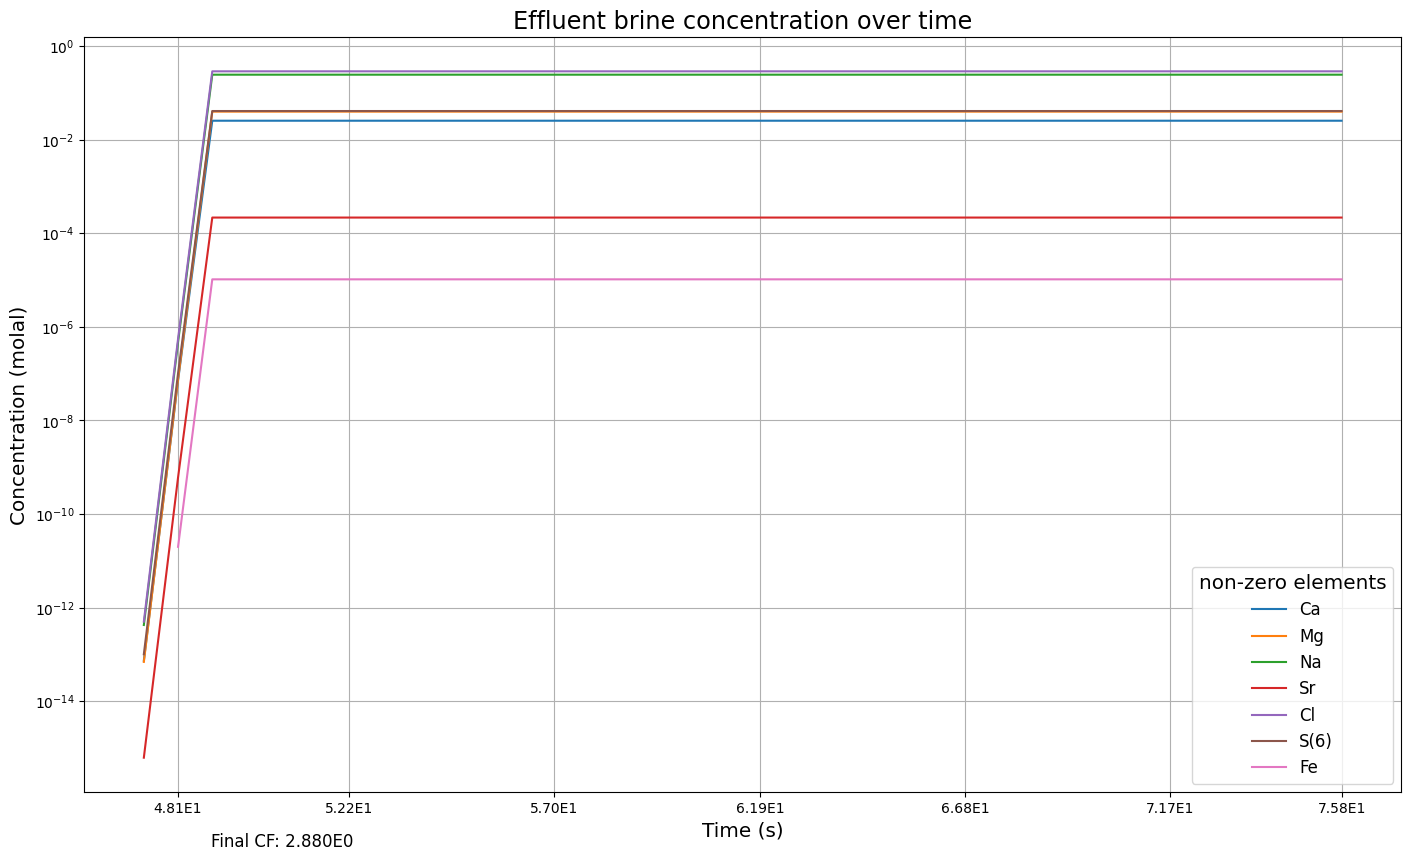

raw_data


sim   state  soln    dist_x       time  step        pH   pe  reaction  \
3     1  transp    60  5.037667   0.000000     0  7.000000  4.0  3.679965   
4     1  transp    60  5.037667   0.814891     1  7.000010  4.0  3.679965   
5     1  transp    60  5.037667   1.629783     2  7.000021  4.0  3.679965   
6     1  transp    60  5.037667   2.444674     3  7.000031  4.0  3.679965   
7     1  transp    60  5.037667   3.259566     4  7.000042  4.0  3.679965   
8     1  transp    60  5.037667   4.074457     5  7.000054  4.0  3.679965   
9     1  transp    60  5.037667   4.889349     6  7.000066  4.0  3.679965   
10    1  transp    60  5.037667   5.704240     7  7.000078  4.0  3.679965   
11    1  transp    60  5.037667   6.519132     8  7.000090  4.0  3.679965   
12    1  transp    60  5.037667   7.334023     9  7.000104  4.0  3.679965   
13    1  transp    60  5.037667   8.148915    10  7.000117  4.0  3.679965   
14    1  transp    60  5.037667   8.963806    11  7.000131  4.0  3.679965   
15    1  transp    60  5.037667   9.778697    12  7.000145  4.0  3.679965   
16    1  transp    60  5.037667  10.593589    13  7.000160  4.0  3.679965   
17    1  transp    60  5.037667  11.408480    14  7.000176  4.0  3.679965   
18    1  transp    60  5.037667  12.223372    15  7.000192  4.0  3.679965   
19    1  transp    60  5.037667  13.038263    16  7.000209  4.0  3.679965   
20    1  transp    60  5.037667  13.853155    17  7.000226  4.0  3.679965   
21    1  transp    60  5.037667  14.668046    18  7.000244  4.0  3.679965   
22    1  transp    60  5.037667  15.482938    19  7.000263  4.0  3.679965   
23    1  transp    60  5.037667  16.297829    20  7.000283  4.0  3.679965   
24    1  transp    60  5.037667  17.112721    21  7.000303  4.0  3.679965   
25    1  transp    60  5.037667  17.927612    22  7.000325  4.0  3.679965   
26    1  transp    60  5.037667  18.742504    23  7.000347  4.0  3.679965   
27    1  transp    60  5.037667  19.557395    24  7.000370  4.0  3.679965   
28    1  transp    60  5.037667  20.372286    25  7.000395  4.0  3.679965   
29    1  transp    60  5.037667  21.187178    26  7.000420  4.0  3.679965   
30    1  transp    60  5.037667  22.002069    27  7.000447  4.0  3.679965   
31    1  transp    60  5.037667  22.816961    28  7.000476  4.0  3.679965   
32    1  transp    60  5.037667  23.631852    29  7.000505  4.0  3.679965   
33    1  transp    60  5.037667  24.446744    30  7.000536  4.0  3.679965   
34    1  transp    60  5.037667  25.261635    31  7.000569  4.0  3.679965   
35    1  transp    60  5.037667  26.076527    32  7.000604  4.0  3.679965   
36    1  transp    60  5.037667  26.891418    33  7.000641  4.0  3.679965   
37    1  transp    60  5.037667  27.706310    34  7.000680  4.0  3.679965   
38    1  transp    60  5.037667  28.521201    35  7.000721  4.0  3.679965   
39    1  transp    60  5.037667  29.336092    36  7.000765  4.0  3.679965   
40    1  transp    60  5.037667  30.150984    37  7.000812  4.0  3.679965   
41    1  transp    60  5.037667  30.965875    38  7.000861  4.0  3.679965   
42    1  transp    60  5.037667  31.780767    39  7.000915  4.0  3.679965   
43    1  transp    60  5.037667  32.595658    40  7.000972  4.0  3.679965   
44    1  transp    60  5.037667  33.410550    41  7.001033  4.0  3.679965   
45    1  transp    60  5.037667  34.225441    42  7.001099  4.0  3.679965   
46    1  transp    60  5.037667  35.040333    43  7.001171  4.0  3.679965   
47    1  transp    60  5.037667  35.855224    44  7.001248  4.0  3.679965   
48    1  transp    60  5.037667  36.670116    45  7.001333  4.0  3.679965   
49    1  transp    60  5.037667  37.485007    46  7.001424  4.0  3.679965   
50    1  transp    60  5.037667  38.299899    47  7.001525  4.0  3.679965   
51    1  transp    60  5.037667  39.114790    48  7.001636  4.0  3.679965   
52    1  transp    60  5.037667  39.929681    49  7.001759  4.0  3.679965   
53    1  transp    60  5.037667  40.744573    50  7.001895  4.0  3.679965   


processed_data


Ca(mol/kgw) Mg(mol/kgw) Na(mol/kgw) Sr(mol/kgw) Cl(mol/kgw)  \
Time (s)                                                               
4.73E1     7.350E-14   6.906E-14   4.250E-13   6.197E-16   5.017E-13   
4.81E1      7.181E-8    7.669E-8    4.719E-7   6.077E-10    5.571E-7   
4.89E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
4.97E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.05E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.13E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.22E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.30E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.38E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.46E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.54E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.62E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.70E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.79E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.87E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.95E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.03E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.11E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.19E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.27E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.36E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.44E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.52E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.60E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.68E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.76E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.85E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.93E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.01E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.09E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.17E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.25E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.33E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.42E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.50E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.58E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   

         S(6)(mol/kgw) Fe(mol/kgw)  
Time (s)                            
4.73E1       1.007E-13         NaN  
4.81E1        1.020E-7   1.993E-11  
4.89E1        4.121E-2    1.040E-5  
4.97E1        4.121E-2    1.040E-5  
5.05E1        4.121E-2    1.040E-5  
5.13E1        4.121E-2    1.040E-5  
5.22E1        4.121E-2    1.040E-5  
5.30E1        4.121E-2    1.040E-5  
5.38E1        4.121E-2    1.040E-5  
5.46E1        4.121E-2    1.040E-5  
5.54E1        4.121E-2    1.040E-5  
5.62E1        4.121E-2    1.040E-5  
5.70E1        4.121E-2    1.040E-5  
5.79E1        4.121E-2    1.040E-5  
5.87E1        4.121E-2    1.040E-5  
5.95E1        4.121E-2    1.040E-5  
6.03E1        4.121E-2    1.040E-5  
6.11E1        4.121E-2    1.040E-5  
6.19E1        4.121E-2    1.040E-5  
6.27E1        4.121E-2    1.040E-5  
6.36E1        4.121E-2    1.040E-5  
6.44E1        4.121E-2    1.040E-5  
6.52E1        4.121E-2    1.040E-5  
6.60E1        4.121E-2    1.040E-5  
6.68E1        4.121E-2    1.040E-5  
6.76E1        4.121E-2    1.040E-5  
6.85E1        4.121E-2    1.040E-5  
6.93E1        4.121E-2    1.040E-5  
7.01E1        4.121E-2    1.040E-5  
7.09E1        4.121E-2    1.040E-5  
7.17E1        4.121E-2    1.040E-5  
7.25E1        4.121E-2    1.040E-5  
7.33E1        

literature_cf 2.8871395568204483
final_cf 2.8796381727678697
{'Ca': {'cf': 1.4191225891233128, '% diff': -50.8765257611161}, 'Mg': {'cf': 2.8964132644293037, '% diff': 26.01278488101516}, 'Na': {'cf': 2.8963854629273587, '% diff': 10.311555716959948}, 'Sr': {}, 'Cl': {'cf': 2.896569806889983, '% diff': -27.432443087795065}, 'S(6)': {'cf': 0.5855540392994084, '% diff': -77.744990060411}, 'Fe': {}}


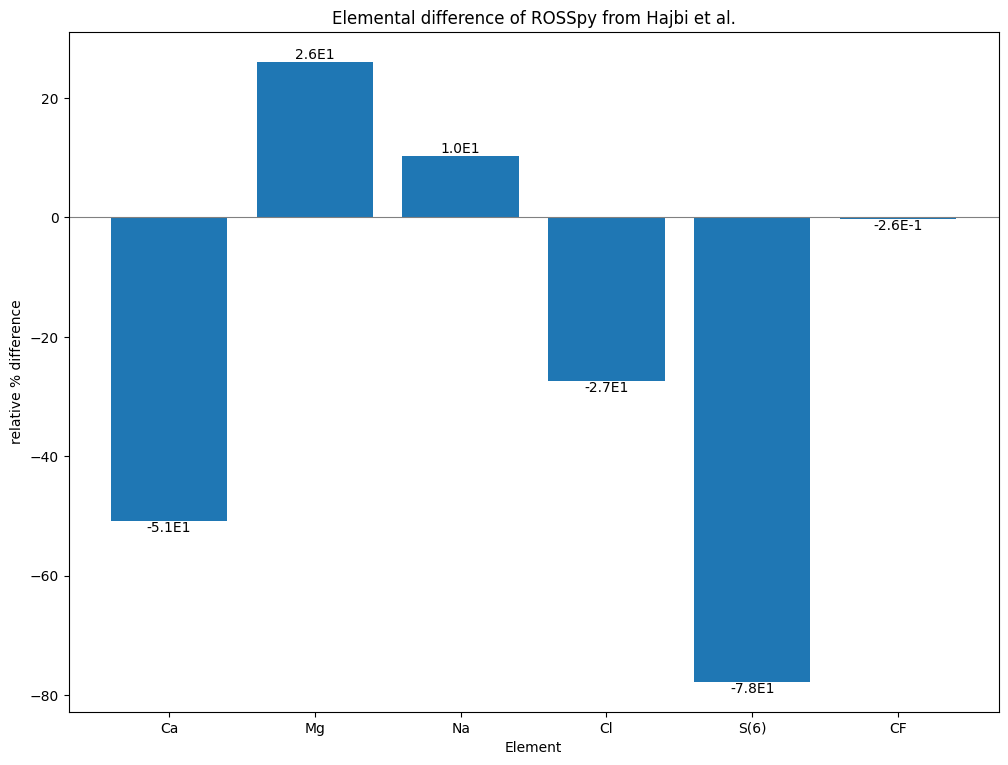

In [65]:
from scipy.constants import nano, milli, day, hour
import os

# run the ROSS model
# %run ../../../rosspy/core.py
# ross = ROSSPkg()
import rosspy
ross = rosspy.ROSSPkg(verbose = False)

def average(some_list):
    return sum(some_list)/ len(some_list)

# module parameters
quantity_of_modules = 5
module_characteristics = {        
    'permeate_flow_m3_per_day': 1200 / quantity_of_modules,
    'max_feed_flow_m3_per_hour': 1848 / (day/hour),
}

# water parameters
solution_description = 'Hajbi'
water_characteristics = {
    'element': {
        'Ca': {
            'concentration (ppm)':720,
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':335,
            'reference':''
        },
        'Na': {
            'concentration (ppm)':1950,
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':13,
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':3550,
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':2250,
            'reference':''
        },
        'Fe': {
            'concentration (ppm)':0.2,
            'reference':''
        }
    }
}

# literature final effluent concentrations 
literature_final_conc = {
    'Ca': 2080,
    'Mg': 770,
    'Na': 5120,
    'Cl': 14170,
    'S(6)': 5920
}
literature_elemental_cfs = {}
for element in literature_final_conc:
    true_element = re.search('([A-Z][a-z]?)', element).group()
    literature_elemental_cfs[element] = literature_final_conc[element]/(water_characteristics['element'][element]['concentration (ppm)'])
literature_cf = average([literature_final_conc[element]/water_characteristics['element'][element]['concentration (ppm)'] for element in literature_final_conc])

# general parameters
database_selection = 'pitzer'
simulation_title = 'test'
simulation = 'brine'
simulation_perspective = 'all_time'
simulation_time = 75
simulation_name = 'multiple_modules'

# create the input file
ross.define_general(database_selection, simulation, quantity_of_modules = quantity_of_modules)
ross.transport(simulation_time, simulation_perspective, module_characteristics, )
ross.reaction(literature_cf)
ross.solutions(water_characteristics = water_characteristics, solution_description = solution_description)
ross.equilibrium_phases()
ross.selected_output()
ross.export(simulation_name)

# execute and process the input file
raw_data1 = ross.execute()
multi_module_data = ross.process_selected_output()

# process and export the data
export_path = os.path.join(ross.simulation_path, 'Hajbi_comparison.png')
compare_brine_concentrations(multi_module_data, raw_data1, export_path, literature_cf)

# Execute multiple modules through all_time, with improvements





Estimated completion in 6.20E1 seconds by 2022-01-02 13:55:28.361422 local time.


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


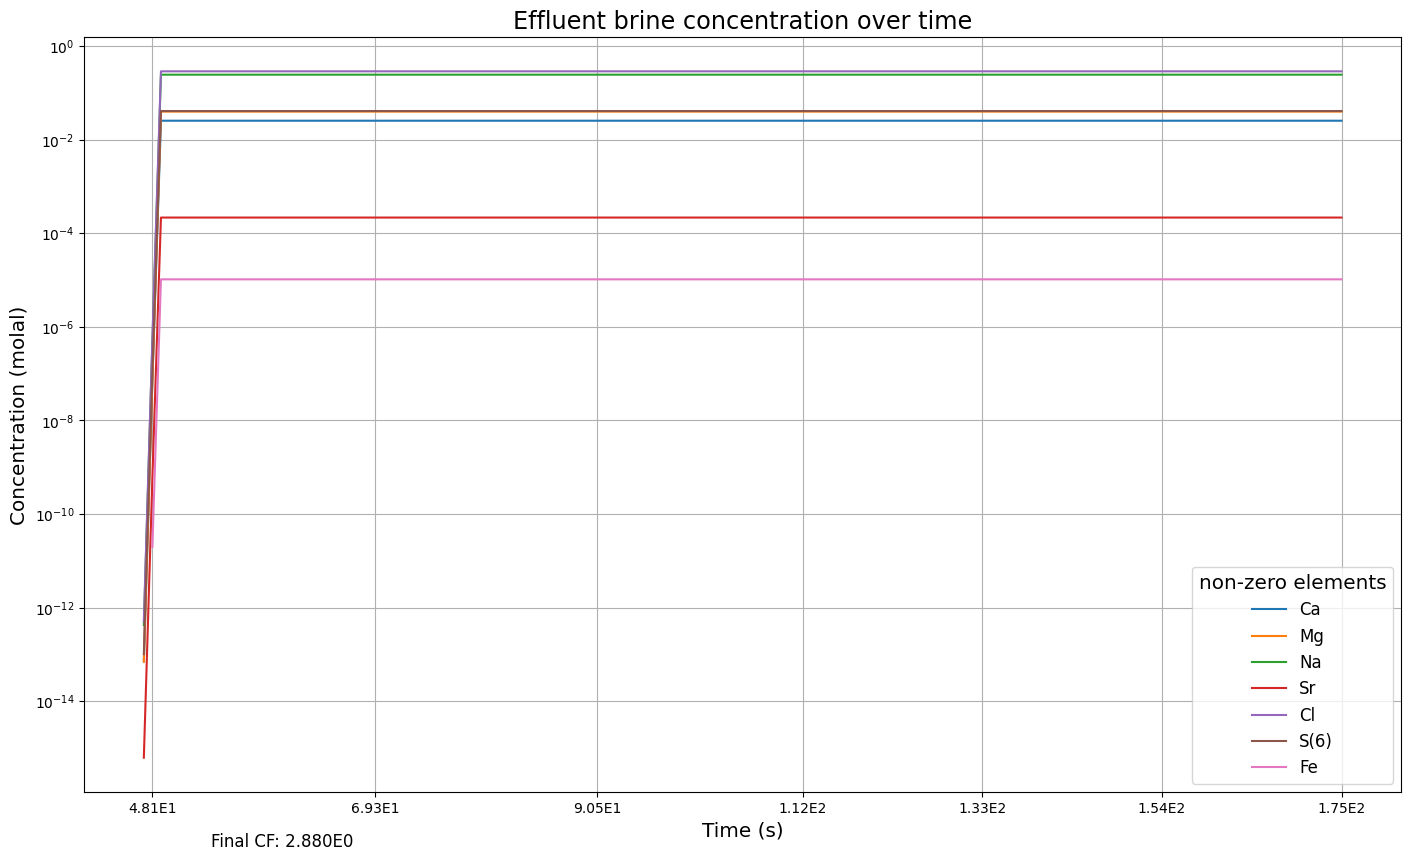

raw_data


sim   state  soln    dist_x        time  step        pH   pe  reaction  \
3      1  transp    60  5.037667    0.000000     0  7.000000  4.0  3.679965   
4      1  transp    60  5.037667    0.814891     1  7.000010  4.0  3.679965   
5      1  transp    60  5.037667    1.629783     2  7.000021  4.0  3.679965   
6      1  transp    60  5.037667    2.444674     3  7.000031  4.0  3.679965   
7      1  transp    60  5.037667    3.259566     4  7.000042  4.0  3.679965   
8      1  transp    60  5.037667    4.074457     5  7.000054  4.0  3.679965   
9      1  transp    60  5.037667    4.889349     6  7.000066  4.0  3.679965   
10     1  transp    60  5.037667    5.704240     7  7.000078  4.0  3.679965   
11     1  transp    60  5.037667    6.519132     8  7.000090  4.0  3.679965   
12     1  transp    60  5.037667    7.334023     9  7.000104  4.0  3.679965   
13     1  transp    60  5.037667    8.148915    10  7.000117  4.0  3.679965   
14     1  transp    60  5.037667    8.963806    11  7.000131  4.0  3.679965   
15     1  transp    60  5.037667    9.778697    12  7.000145  4.0  3.679965   
16     1  transp    60  5.037667   10.593589    13  7.000160  4.0  3.679965   
17     1  transp    60  5.037667   11.408480    14  7.000176  4.0  3.679965   
18     1  transp    60  5.037667   12.223372    15  7.000192  4.0  3.679965   
19     1  transp    60  5.037667   13.038263    16  7.000209  4.0  3.679965   
20     1  transp    60  5.037667   13.853155    17  7.000226  4.0  3.679965   
21     1  transp    60  5.037667   14.668046    18  7.000244  4.0  3.679965   
22     1  transp    60  5.037667   15.482938    19  7.000263  4.0  3.679965   
23     1  transp    60  5.037667   16.297829    20  7.000283  4.0  3.679965   
24     1  transp    60  5.037667   17.112721    21  7.000303  4.0  3.679965   
25     1  transp    60  5.037667   17.927612    22  7.000325  4.0  3.679965   
26     1  transp    60  5.037667   18.742504    23  7.000347  4.0  3.679965   
27     1  transp    60  5.037667   19.557395    24  7.000370  4.0  3.679965   
28     1  transp    60  5.037667   20.372286    25  7.000395  4.0  3.679965   
29     1  transp    60  5.037667   21.187178    26  7.000420  4.0  3.679965   
30     1  transp    60  5.037667   22.002069    27  7.000447  4.0  3.679965   
31     1  transp    60  5.037667   22.816961    28  7.000476  4.0  3.679965   
32     1  transp    60  5.037667   23.631852    29  7.000505  4.0  3.679965   
33     1  transp    60  5.037667   24.446744    30  7.000536  4.0  3.679965   
34     1  transp    60  5.037667   25.261635    31  7.000569  4.0  3.679965   
35     1  transp    60  5.037667   26.076527    32  7.000604  4.0  3.679965   
36     1  transp    60  5.037667   26.891418    33  7.000641  4.0  3.679965   
37     1  transp    60  5.037667   27.706310    34  7.000680  4.0  3.679965   
38     1  transp    60  5.037667   28.521201    35  7.000721  4.0  3.679965   
39     1  transp    60  5.037667   29.336092    36  7.000765  4.0  3.679965   
40     1  transp    60  5.037667   30.150984    37  7.000812  4.0  3.679965   
41     1  transp    60  5.037667   30.965875    38  7.000861  4.0  3.679965   
42     1  transp    60  5.037667   31.780767    39  7.000915  4.0  3.679965   
43     1  transp    60  5.037667   32.595658    40  7.000972  4.0  3.679965   
44     1  transp    60  5.037667   33.410550    41  7.001033  4.0  3.679965   
45     1  transp    60  5.037667   34.225441    42  7.001099  4.0  3.679965   
46     1  transp    60  5.037667   35.040333    43  7.001171  4.0  3.679965   
47     1  transp    60  5.037667   35.855224    44  7.001248  4.0  3.679965   
48     1  transp    60  5.037667   36.670116    45  7.001333  4.0  3.679965   
49     1  transp    60  5.037667   37.485007    46  7.001424  4.0  3.679965   
50     1  transp    60  5.037667   38.299899    47  7.001525  4.0  3.679965   
51     1  transp    60  5.037667   39.114790    48  7.001636  4.0  3.679965   
52     1  transp    60  5.037667   39.929681    49  7.0

processed_data


Ca(mol/kgw) Mg(mol/kgw) Na(mol/kgw) Sr(mol/kgw) Cl(mol/kgw)  \
Time (s)                                                               
4.73E1     7.350E-14   6.906E-14   4.250E-13   6.197E-16   5.017E-13   
4.81E1      7.181E-8    7.669E-8    4.719E-7   6.077E-10    5.571E-7   
4.89E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
4.97E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.05E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.13E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.22E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.30E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.38E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.46E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.54E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.62E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.70E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.79E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.87E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.95E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.03E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.11E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.19E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.27E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.36E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.44E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.52E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.60E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.68E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.76E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.85E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.93E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.01E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.09E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.17E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.25E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.33E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.42E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.50E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.58E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.66E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.74E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.82E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.90E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.99E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.07E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.15E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.23E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.31E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.39E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.47E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.56E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.64E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.72E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.80E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.88E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.96E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
9.05E1      2.557E-2    4.004E-2    2.464E-1    2

literature_cf 2.8871395568204483
final_cf 2.8796381727678595
{'Ca': {'% diff': -0.060553802369103446}, 'Mg': {'% diff': 25.60931838114937}, 'Na': {'% diff': 9.959416714841304}, 'Sr': {}, 'Cl': {'% diff': -27.668698470623927}, 'S(6)': {'% diff': 9.73081085888527}, 'Fe': {}}


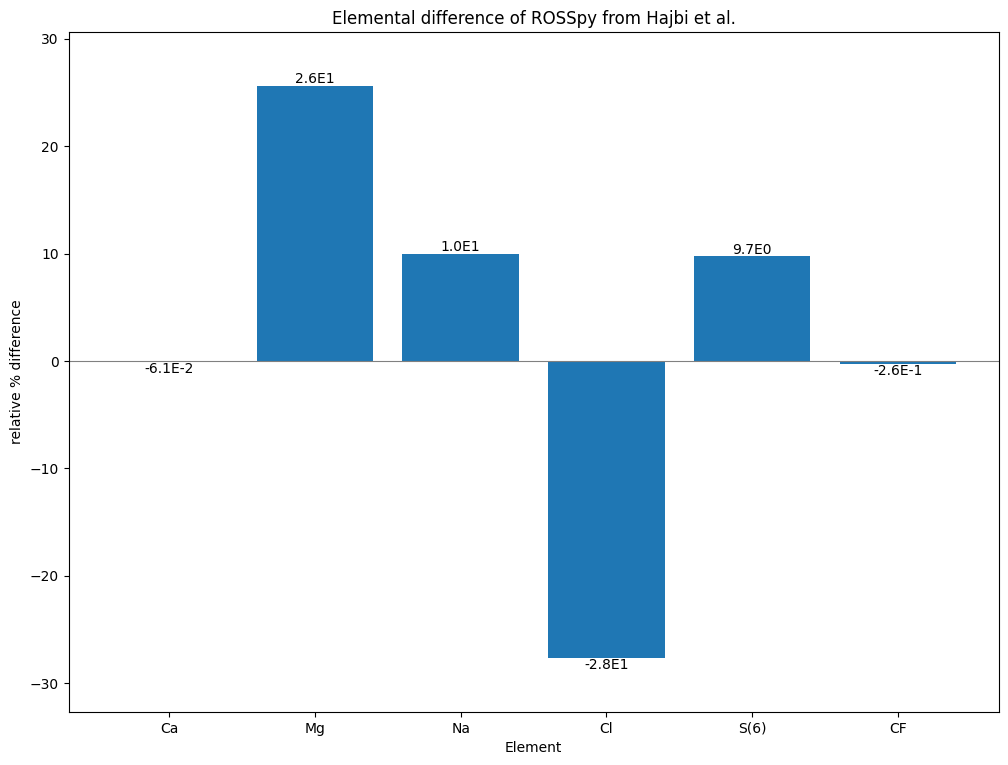

In [66]:
from scipy.constants import nano, milli, day, hour
import os

# run the ROSS model
# %run ../../../rosspy/core.py
# ross = ROSSPkg()
import rosspy
ross = rosspy.ROSSPkg(verbose = False)

def average(some_list):
    return sum(some_list)/ len(some_list)

# module parameters
quantity_of_modules = 5
module_characteristics = {        
    'permeate_flow_m3_per_day': 1200 / quantity_of_modules,
    'max_feed_flow_m3_per_hour': 1848 / (day/hour),
}

# water parameters
solution_description = 'Hajbi'
custom_water_parameters = {
    'element': {
        'Ca': {
            'concentration (ppm)':720,
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':335,
            'reference':''
        },
        'Na': {
            'concentration (ppm)':1950,
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':13,
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':3550,
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':2250,
            'reference':''
        },
        'Fe': {
            'concentration (ppm)':0.2,
            'reference':''
        }
    }
}

# literature final effluent concentrations 
literature_final_conc = {
    'Ca': 2080,
    'Mg': 770,
    'Na': 5120,
    'Cl': 14170,
    'S(6)': 5920
}
literature_elemental_cfs = {}
for element in literature_final_conc:
    true_element = re.search('([A-Z][a-z]?)', element).group()
    literature_elemental_cfs[element] = literature_final_conc[element]/(custom_water_parameters['element'][element]['concentration (ppm)'])
literature_cf = average([literature_final_conc[element]/custom_water_parameters['element'][element]['concentration (ppm)'] for element in literature_final_conc])

# general parameters
database_selection = 'pitzer'
simulation_title = 'test'
simulation = 'brine'
simulation_perspective = 'all_time'
simulation_time = 175
simulation_name = 'improved_multiple_modules'

# create the input file
ross.define_general(database_selection, simulation, quantity_of_modules = quantity_of_modules)
ross.transport(simulation_time, simulation_perspective, module_characteristics, )
ross.reaction(literature_cf)
ross.solutions(water_characteristics = water_characteristics, solution_description = solution_description)
ross.equilibrium_phases()
ross.selected_output()
ross.export(simulation_name)

# execute and process the input file
raw_data1 = ross.execute()
multi_module_data = ross.process_selected_output()

# process and export the data
export_path = os.path.join(ross.simulation_path, 'Hajbi_comparison.png')
compare_brine_concentrations(multi_module_data, raw_data1, export_path, literature_cf, False)

## Execute a single module over all_time





Estimated completion in 3.20E1 seconds by 2022-01-02 13:55:55.762854 local time.


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


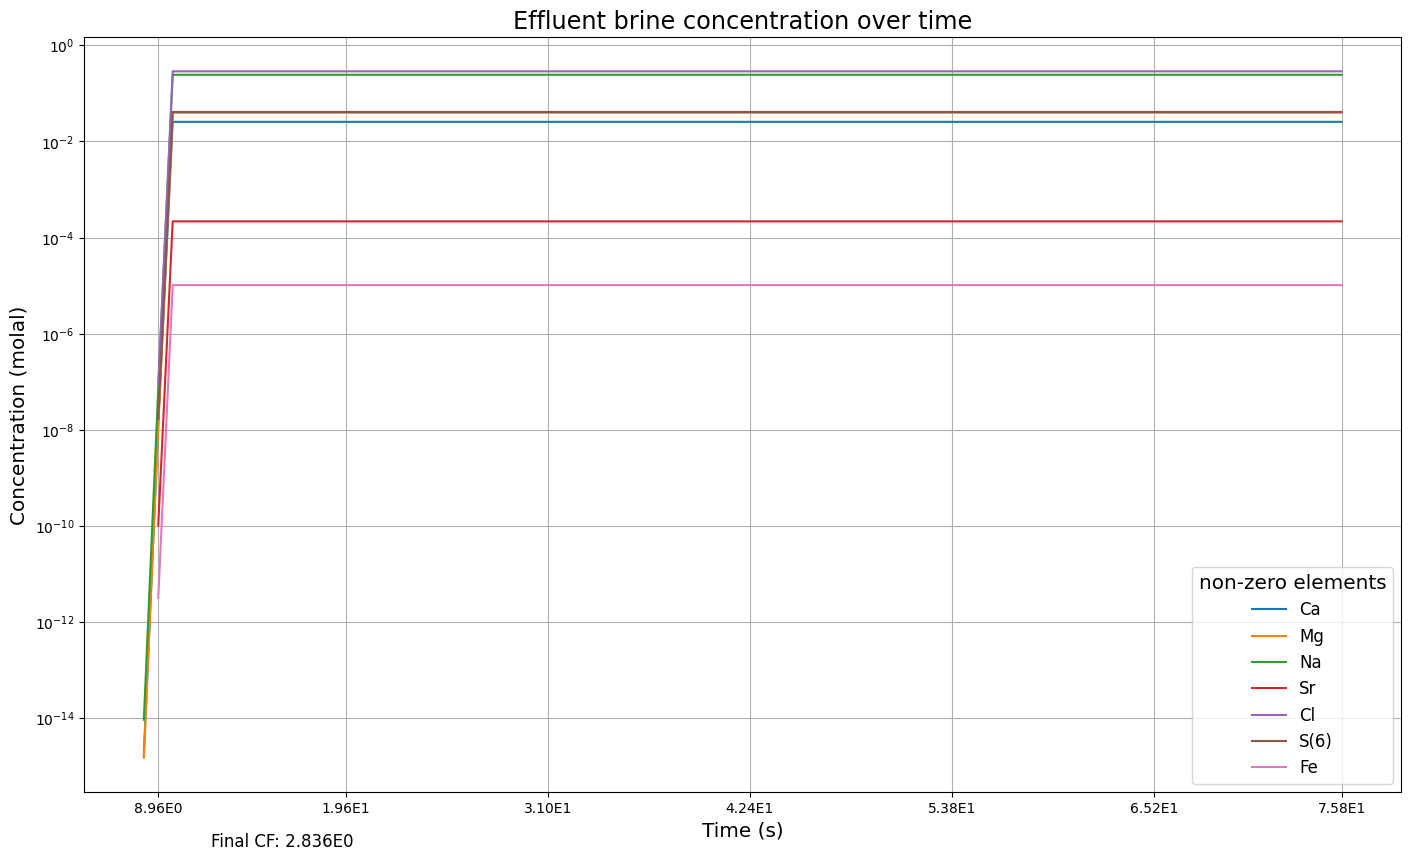

raw_data


sim   state  soln    dist_x        time  step        pH   pe  reaction  \
3      1  transp    60  5.037667    0.000000     0  7.000000  4.0  3.679965   
4      1  transp    60  5.037667    0.814891     1  7.000010  4.0  3.679965   
5      1  transp    60  5.037667    1.629783     2  7.000021  4.0  3.679965   
6      1  transp    60  5.037667    2.444674     3  7.000031  4.0  3.679965   
7      1  transp    60  5.037667    3.259566     4  7.000042  4.0  3.679965   
8      1  transp    60  5.037667    4.074457     5  7.000054  4.0  3.679965   
9      1  transp    60  5.037667    4.889349     6  7.000066  4.0  3.679965   
10     1  transp    60  5.037667    5.704240     7  7.000078  4.0  3.679965   
11     1  transp    60  5.037667    6.519132     8  7.000090  4.0  3.679965   
12     1  transp    60  5.037667    7.334023     9  7.000104  4.0  3.679965   
13     1  transp    60  5.037667    8.148915    10  7.000117  4.0  3.679965   
14     1  transp    60  5.037667    8.963806    11  7.000131  4.0  3.679965   
15     1  transp    60  5.037667    9.778697    12  7.000145  4.0  3.679965   
16     1  transp    60  5.037667   10.593589    13  7.000160  4.0  3.679965   
17     1  transp    60  5.037667   11.408480    14  7.000176  4.0  3.679965   
18     1  transp    60  5.037667   12.223372    15  7.000192  4.0  3.679965   
19     1  transp    60  5.037667   13.038263    16  7.000209  4.0  3.679965   
20     1  transp    60  5.037667   13.853155    17  7.000226  4.0  3.679965   
21     1  transp    60  5.037667   14.668046    18  7.000244  4.0  3.679965   
22     1  transp    60  5.037667   15.482938    19  7.000263  4.0  3.679965   
23     1  transp    60  5.037667   16.297829    20  7.000283  4.0  3.679965   
24     1  transp    60  5.037667   17.112721    21  7.000303  4.0  3.679965   
25     1  transp    60  5.037667   17.927612    22  7.000325  4.0  3.679965   
26     1  transp    60  5.037667   18.742504    23  7.000347  4.0  3.679965   
27     1  transp    60  5.037667   19.557395    24  7.000370  4.0  3.679965   
28     1  transp    60  5.037667   20.372286    25  7.000395  4.0  3.679965   
29     1  transp    60  5.037667   21.187178    26  7.000420  4.0  3.679965   
30     1  transp    60  5.037667   22.002069    27  7.000447  4.0  3.679965   
31     1  transp    60  5.037667   22.816961    28  7.000476  4.0  3.679965   
32     1  transp    60  5.037667   23.631852    29  7.000505  4.0  3.679965   
33     1  transp    60  5.037667   24.446744    30  7.000536  4.0  3.679965   
34     1  transp    60  5.037667   25.261635    31  7.000569  4.0  3.679965   
35     1  transp    60  5.037667   26.076527    32  7.000604  4.0  3.679965   
36     1  transp    60  5.037667   26.891418    33  7.000641  4.0  3.679965   
37     1  transp    60  5.037667   27.706310    34  7.000680  4.0  3.679965   
38     1  transp    60  5.037667   28.521201    35  7.000721  4.0  3.679965   
39     1  transp    60  5.037667   29.336092    36  7.000765  4.0  3.679965   
40     1  transp    60  5.037667   30.150984    37  7.000812  4.0  3.679965   
41     1  transp    60  5.037667   30.965875    38  7.000861  4.0  3.679965   
42     1  transp    60  5.037667   31.780767    39  7.000915  4.0  3.679965   
43     1  transp    60  5.037667   32.595658    40  7.000972  4.0  3.679965   
44     1  transp    60  5.037667   33.410550    41  7.001033  4.0  3.679965   
45     1  transp    60  5.037667   34.225441    42  7.001099  4.0  3.679965   
46     1  transp    60  5.037667   35.040333    43  7.001171  4.0  3.679965   
47     1  transp    60  5.037667   35.855224    44  7.001248  4.0  3.679965   
48     1  transp    60  5.037667   36.670116    45  7.001333  4.0  3.679965   
49     1  transp    60  5.037667   37.485007    46  7.001424  4.0  3.679965   
50     1  transp    60  5.037667   38.299899    47  7.001525  4.0  3.679965   
51     1  transp    60  5.037667   39.114790    48  7.001636  4.0  3.679965   
52     1  transp    60  5.037667   39.929681    49  7.0

processed_data


Ca(mol/kgw) Mg(mol/kgw) Na(mol/kgw) Sr(mol/kgw) Cl(mol/kgw)  \
Time (s)                                                               
4.73E1     7.350E-14   6.906E-14   4.250E-13   6.197E-16   5.017E-13   
4.81E1      7.181E-8    7.669E-8    4.719E-7   6.077E-10    5.571E-7   
4.89E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
4.97E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.05E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.13E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.22E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.30E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.38E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.46E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.54E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.62E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.70E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.79E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.87E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.95E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.03E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.11E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.19E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.27E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.36E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.44E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.52E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.60E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.68E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.76E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.85E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.93E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.01E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.09E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.17E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.25E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.33E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.42E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.50E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.58E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.66E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.74E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.82E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.90E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.99E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.07E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.15E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.23E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.31E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.39E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.47E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.56E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.64E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.72E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.80E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.88E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.96E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
9.05E1      2.557E-2    4.004E-2    2.464E-1    2

literature_cf 2.8871395568204483
final_cf 2.8796381727678595
{'Ca': {'% diff': -0.060553802369103446}, 'Mg': {'% diff': 25.60931838114937}, 'Na': {'% diff': 9.959416714841304}, 'Sr': {}, 'Cl': {'% diff': -27.668698470623927}, 'S(6)': {'% diff': 9.73081085888527}, 'Fe': {}}


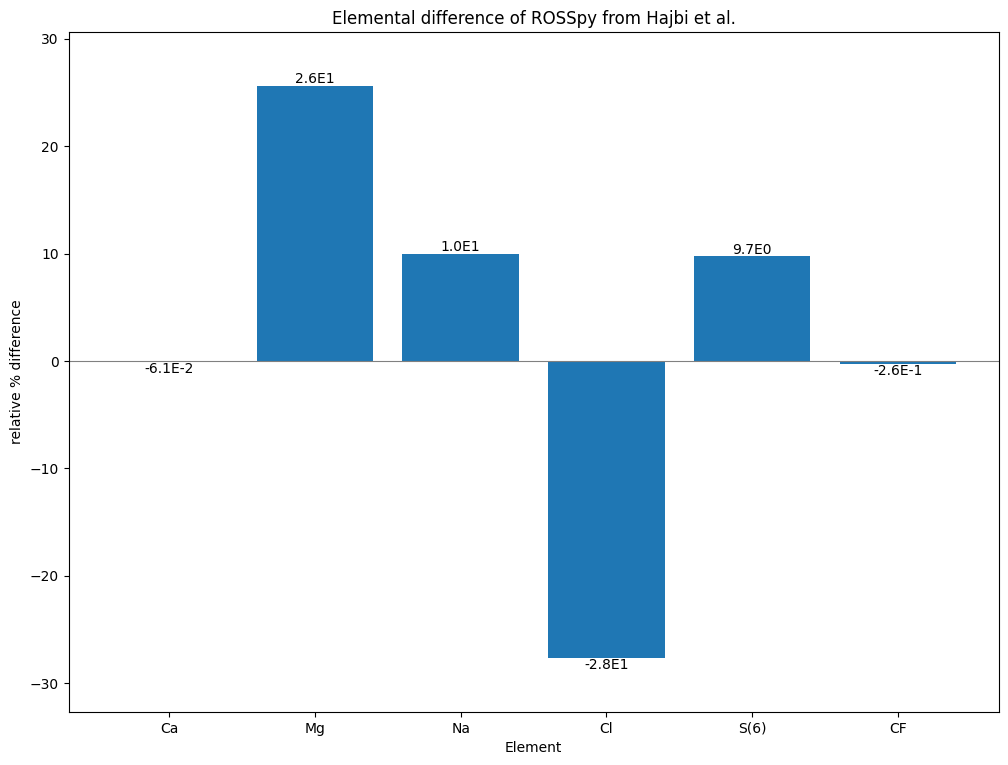

In [67]:
from scipy.constants import nano, milli, day, hour

# run the ROSS model
# %run ../../../rosspy/core.py
# ross = ROSSPkg()
import rosspy
ross = rosspy.ROSSPkg(verbose = False)

def average(some_list):
    return sum(some_list)/ len(some_list)

# module parameters
quantity_of_modules = 1
module_characteristics = {        
    'permeate_flow_m3_per_day': 1200 / quantity_of_modules,
    'max_feed_flow_m3_per_hour': 1848 / (day/hour),
}

# water parameters
solution_description = 'Hajbi'
custom_water_parameters = {
    'element': {
        'Ca': {
            'concentration (ppm)':720,
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':335,
            'reference':''
        },
        'Na': {
            'concentration (ppm)':1950,
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':13,
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':3550,
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':2250,
            'reference':''
        },
        'Fe': {
            'concentration (ppm)':0.2,
            'reference':''
        }
    }
}

# general parameters
database_selection = 'pitzer'
simulation_title = 'test'
simulation = 'brine'
simulation_perspective = 'all_time'
simulation_time = 75
simulation_name = 'improved_single_module'

# create the input file
ross.define_general(database_selection, simulation, quantity_of_modules = quantity_of_modules)
ross.transport(simulation_time, simulation_perspective, module_characteristics, )
ross.reaction(literature_cf)
ross.solutions(water_characteristics = water_characteristics, solution_description = solution_description)
ross.equilibrium_phases()
ross.selected_output()
ross.export(simulation_name)

# execute the input file
raw_data2 = ross.execute()
single_module_data1 = ross.process_selected_output()

# process and export the data
export_path = os.path.join(ross.simulation_path, 'Hajbi_comparison.png')
compare_brine_concentrations(multi_module_data, raw_data1, export_path, literature_cf, False)

## Execute a single module over all_distance





Estimated completion in 3.20E1 seconds by 2022-01-02 13:56:03.788138 local time.


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


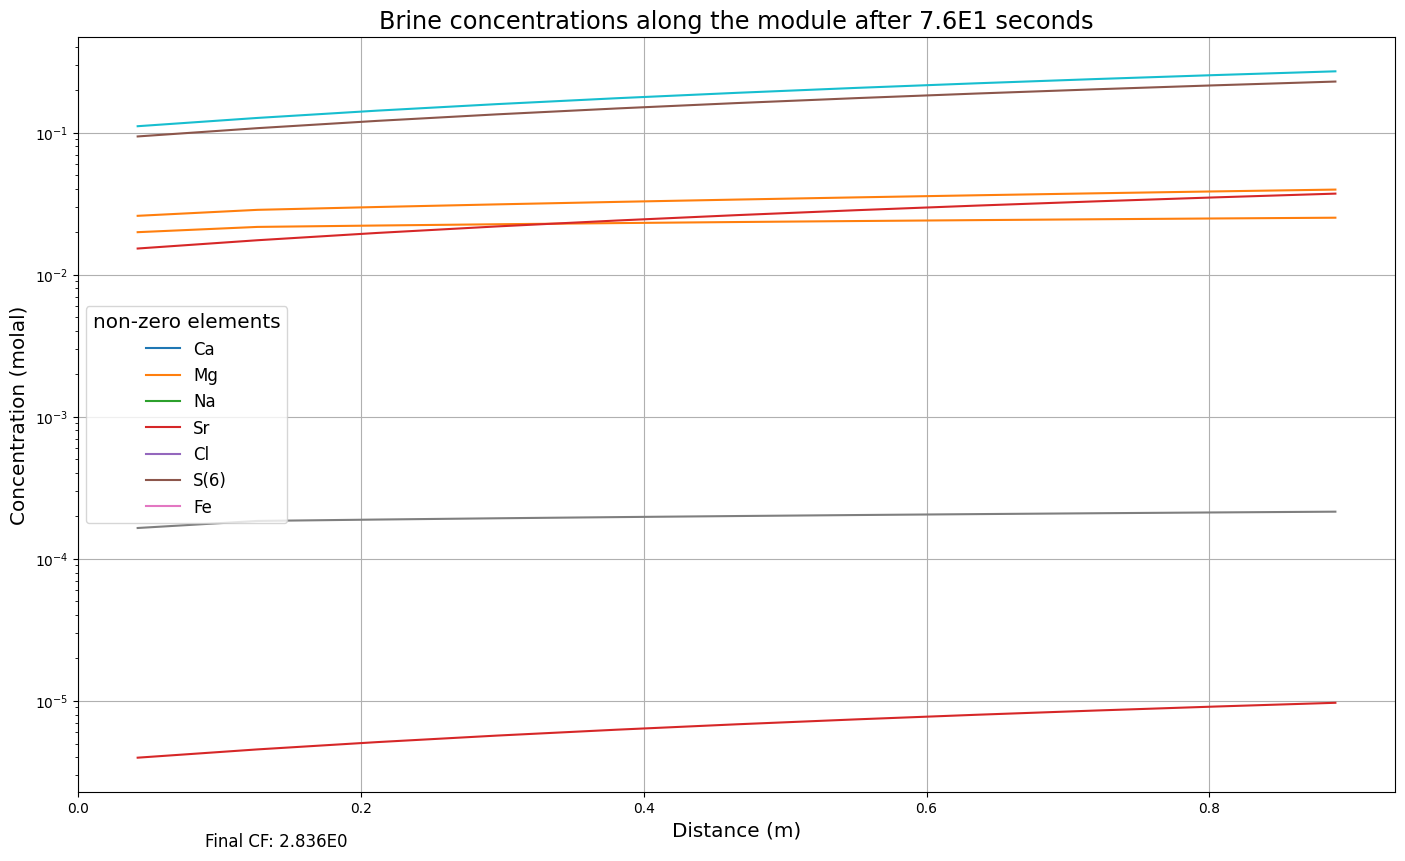

raw_data


sim   state  soln    dist_x        time  step        pH   pe  reaction  \
3      1  transp    60  5.037667    0.000000     0  7.000000  4.0  3.679965   
4      1  transp    60  5.037667    0.814891     1  7.000010  4.0  3.679965   
5      1  transp    60  5.037667    1.629783     2  7.000021  4.0  3.679965   
6      1  transp    60  5.037667    2.444674     3  7.000031  4.0  3.679965   
7      1  transp    60  5.037667    3.259566     4  7.000042  4.0  3.679965   
8      1  transp    60  5.037667    4.074457     5  7.000054  4.0  3.679965   
9      1  transp    60  5.037667    4.889349     6  7.000066  4.0  3.679965   
10     1  transp    60  5.037667    5.704240     7  7.000078  4.0  3.679965   
11     1  transp    60  5.037667    6.519132     8  7.000090  4.0  3.679965   
12     1  transp    60  5.037667    7.334023     9  7.000104  4.0  3.679965   
13     1  transp    60  5.037667    8.148915    10  7.000117  4.0  3.679965   
14     1  transp    60  5.037667    8.963806    11  7.000131  4.0  3.679965   
15     1  transp    60  5.037667    9.778697    12  7.000145  4.0  3.679965   
16     1  transp    60  5.037667   10.593589    13  7.000160  4.0  3.679965   
17     1  transp    60  5.037667   11.408480    14  7.000176  4.0  3.679965   
18     1  transp    60  5.037667   12.223372    15  7.000192  4.0  3.679965   
19     1  transp    60  5.037667   13.038263    16  7.000209  4.0  3.679965   
20     1  transp    60  5.037667   13.853155    17  7.000226  4.0  3.679965   
21     1  transp    60  5.037667   14.668046    18  7.000244  4.0  3.679965   
22     1  transp    60  5.037667   15.482938    19  7.000263  4.0  3.679965   
23     1  transp    60  5.037667   16.297829    20  7.000283  4.0  3.679965   
24     1  transp    60  5.037667   17.112721    21  7.000303  4.0  3.679965   
25     1  transp    60  5.037667   17.927612    22  7.000325  4.0  3.679965   
26     1  transp    60  5.037667   18.742504    23  7.000347  4.0  3.679965   
27     1  transp    60  5.037667   19.557395    24  7.000370  4.0  3.679965   
28     1  transp    60  5.037667   20.372286    25  7.000395  4.0  3.679965   
29     1  transp    60  5.037667   21.187178    26  7.000420  4.0  3.679965   
30     1  transp    60  5.037667   22.002069    27  7.000447  4.0  3.679965   
31     1  transp    60  5.037667   22.816961    28  7.000476  4.0  3.679965   
32     1  transp    60  5.037667   23.631852    29  7.000505  4.0  3.679965   
33     1  transp    60  5.037667   24.446744    30  7.000536  4.0  3.679965   
34     1  transp    60  5.037667   25.261635    31  7.000569  4.0  3.679965   
35     1  transp    60  5.037667   26.076527    32  7.000604  4.0  3.679965   
36     1  transp    60  5.037667   26.891418    33  7.000641  4.0  3.679965   
37     1  transp    60  5.037667   27.706310    34  7.000680  4.0  3.679965   
38     1  transp    60  5.037667   28.521201    35  7.000721  4.0  3.679965   
39     1  transp    60  5.037667   29.336092    36  7.000765  4.0  3.679965   
40     1  transp    60  5.037667   30.150984    37  7.000812  4.0  3.679965   
41     1  transp    60  5.037667   30.965875    38  7.000861  4.0  3.679965   
42     1  transp    60  5.037667   31.780767    39  7.000915  4.0  3.679965   
43     1  transp    60  5.037667   32.595658    40  7.000972  4.0  3.679965   
44     1  transp    60  5.037667   33.410550    41  7.001033  4.0  3.679965   
45     1  transp    60  5.037667   34.225441    42  7.001099  4.0  3.679965   
46     1  transp    60  5.037667   35.040333    43  7.001171  4.0  3.679965   
47     1  transp    60  5.037667   35.855224    44  7.001248  4.0  3.679965   
48     1  transp    60  5.037667   36.670116    45  7.001333  4.0  3.679965   
49     1  transp    60  5.037667   37.485007    46  7.001424  4.0  3.679965   
50     1  transp    60  5.037667   38.299899    47  7.001525  4.0  3.679965   
51     1  transp    60  5.037667   39.114790    48  7.001636  4.0  3.679965   
52     1  transp    60  5.037667   39.929681    49  7.0

processed_data


Ca(mol/kgw) Mg(mol/kgw) Na(mol/kgw) Sr(mol/kgw) Cl(mol/kgw)  \
Time (s)                                                               
4.73E1     7.350E-14   6.906E-14   4.250E-13   6.197E-16   5.017E-13   
4.81E1      7.181E-8    7.669E-8    4.719E-7   6.077E-10    5.571E-7   
4.89E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
4.97E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.05E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.13E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.22E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.30E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.38E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.46E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.54E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.62E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.70E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.79E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.87E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
5.95E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.03E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.11E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.19E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.27E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.36E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.44E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.52E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.60E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.68E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.76E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.85E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
6.93E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.01E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.09E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.17E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.25E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.33E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.42E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.50E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.58E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.66E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.74E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.82E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.90E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
7.99E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.07E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.15E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.23E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.31E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.39E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.47E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.56E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.64E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.72E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.80E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.88E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
8.96E1      2.557E-2    4.004E-2    2.464E-1    2.177E-4    2.909E-1   
9.05E1      2.557E-2    4.004E-2    2.464E-1    2

literature_cf 2.8871395568204483
final_cf 2.8796381727678595
{'Ca': {'% diff': -0.060553802369103446}, 'Mg': {'% diff': 25.60931838114937}, 'Na': {'% diff': 9.959416714841304}, 'Sr': {}, 'Cl': {'% diff': -27.668698470623927}, 'S(6)': {'% diff': 9.73081085888527}, 'Fe': {}}


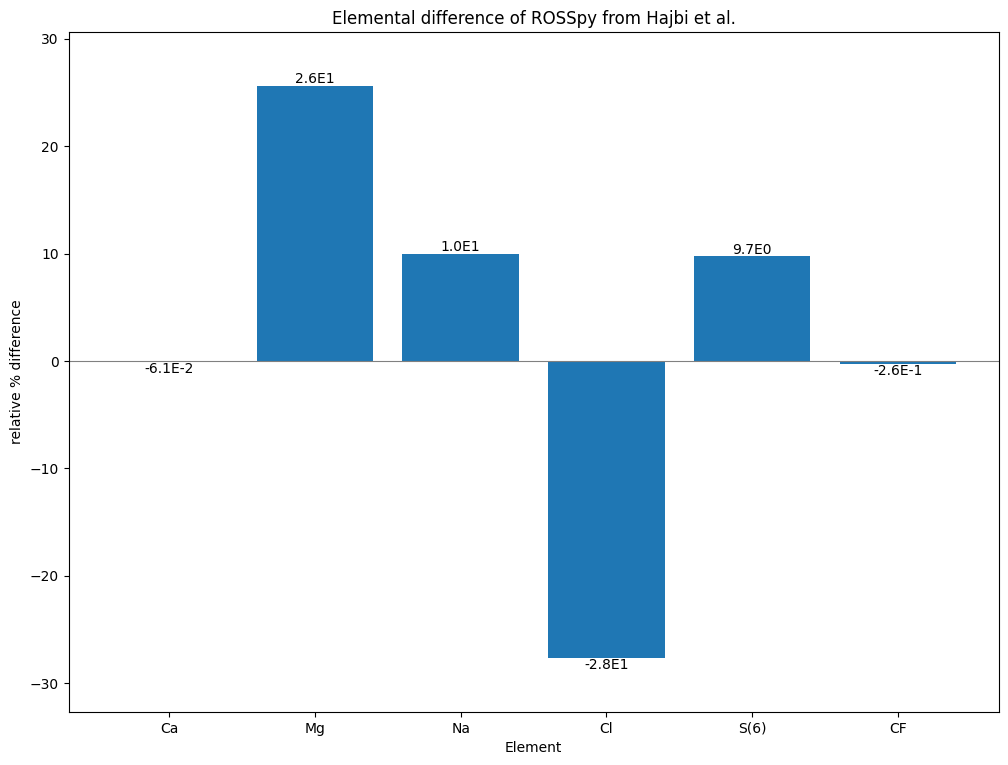

In [68]:
from scipy.constants import nano, milli, day, hour

# run the ROSS model
# %run ../../../rosspy/core.py
# ross = ROSSPkg()
import rosspy
ross = rosspy.ROSSPkg(verbose = False)

def average(some_list):
    return sum(some_list)/ len(some_list)

# module parameters
quantity_of_modules = 1
solution_description = 'Hajbi'
module_characteristics = {        
    'permeate_flow_m3_per_day': 1200 / quantity_of_modules,
    'max_feed_flow_m3_per_hour': 1848 / (day/hour),
}

# water parameters
custom_water_parameters = {
    'element': {
        'Ca': {
            'concentration (ppm)':720,
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':335,
            'reference':''
        },
        'Na': {
            'concentration (ppm)':1950,
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':13,
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':3550,
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':2250,
            'reference':''
        },
        'Fe': {
            'concentration (ppm)':0.2,
            'reference':''
        }
    }
}

# general parameters
database_selection = 'pitzer'
simulation_title = 'test'
simulation = 'brine'
simulation_perspective = 'all_distance'
simulation_time = 75
simulation_name = 'improved_single_module_over_distance'

# create the input file
ross.define_general(database_selection, simulation, quantity_of_modules = quantity_of_modules)
ross.transport(simulation_time, simulation_perspective, module_characteristics, )
ross.reaction(literature_cf)
ross.solutions(water_characteristics = water_characteristics, solution_description = solution_description)
ross.equilibrium_phases()
ross.selected_output()
ross.export(simulation_name)

# execute the input file
raw_data3 = ross.execute()
single_module_data2 = ross.process_selected_output()

# process and export the data
export_path = os.path.join(ross.simulation_path, 'Hajbi_comparison.png')
compare_brine_concentrations(multi_module_data, raw_data1, export_path, literature_cf, False)